# Lab 3

Author: Ryan Rosiak [rrosiak1@gulls.salisbury.edu]

Date: 9/17/20

Description: Working with the adult dataset and starting some real data visualization

In [2]:
import pandas as pd # Pandas library
import numpy as np # Numpy library
import matplotlib.pyplot as plt # Matplotlib library for plotting

In [3]:
# Parse the file
adult_data = pd.read_csv('./adult.data',
                      header=None,
                      skipinitialspace=True,
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ]
                     )
adult_data.head() # Printing the first couple sets of data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_data[['occupation', 'income']].head() # Printing the data of occupation and income

,occupation,income
0,Adm-clerical,<=50K
1,Exec-managerial,<=50K
2,Handlers-cleaners,<=50K
3,Handlers-cleaners,<=50K
4,Prof-specialty,<=50K


In [5]:
# 3.a Rank the data in terms of most likely to make the most money
# Select what columns I want first
tmp = adult_data[['occupation', 'income']]
# Sort the data by occupations that make more than 50k and then group by their occupation and count the amount, sort their incomes in descending order
tmp[tmp['income'] == ">50K"].groupby(by='occupation').count().sort_values(by='income', ascending=False)

,income
occupation,
Exec-managerial,1968
Prof-specialty,1859
Sales,983
Craft-repair,929
Adm-clerical,507
Transport-moving,320
Tech-support,283
Machine-op-inspct,250
Protective-serv,211


In [6]:
# 3.b
tmp = adult_data[['age', 'sex', 'income']]
# The median age for people that make more than 50K
print('The median age for people that make more than 50K')
print(tmp[tmp['income'] == ">50K"].loc[:,'age'].median())
# The median age for people that make less than 50K
print('The median age for people that make less than 50K')
print(tmp[tmp['income'] == "<=50K"].loc[:,'age'].median())
# The median age for people (split by men and women) that make more than 50K
print('The median age for men that make more than 50K')
sub_tmp = tmp[tmp['income'] == ">50K"]
print(sub_tmp[sub_tmp['sex'] == "Male"].loc[:,'age'].median())
print('The median age for women that make more than 50K')
print(sub_tmp[sub_tmp['sex'] == "Female"].loc[:,'age'].median())
# The median age for people (split by men and women) that make less than 50K
print('The median age for men that make less than 50K')
sub_tmp = tmp[tmp['income'] == "<=50K"]
print(sub_tmp[sub_tmp['sex'] == "Male"].loc[:,'age'].median())
print('The median age for women that make less than 50K')
print(sub_tmp[sub_tmp['sex'] == "Female"].loc[:,'age'].median())

The median age for people that make more than 50K
44.0
The median age for people that make less than 50K
34.0
The median age for men that make more than 50K
44.0
The median age for women that make more than 50K
41.0
The median age for men that make less than 50K
35.0
The median age for women that make less than 50K
34.0


In [7]:
# 3.c
tmp = adult_data[['education-num', 'income']]
# The mean and median number of years of education for adults that make more than 50K
print('The mean number of years of education for adults that make more than 50K')
print(tmp[tmp['income'] == ">50K"].loc[:,'education-num'].mean())
print('The median number of years of education for adults that make more than 50K')
print(tmp[tmp['income'] == ">50K"].loc[:,'education-num'].median())
# The mean and median number of years of education for adults that make less than 50K
print('The mean number of years of education for adults that make less than 50K')
print(tmp[tmp['income'] == "<=50K"].loc[:,'education-num'].mean())
print('The median number of years of education for adults that make less than 50K')
print(tmp[tmp['income'] == "<=50K"].loc[:,'education-num'].median())

The mean number of years of education for adults that make more than 50K
11.6116566764
The median number of years of education for adults that make more than 50K
12.0
The mean number of years of education for adults that make less than 50K
9.59506472492
The median number of years of education for adults that make less than 50K
9.0


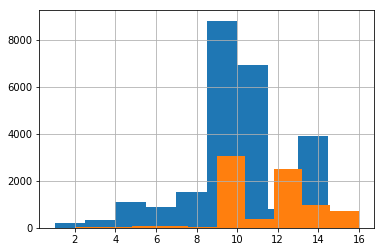

In [10]:
# 3.d 
# Plotting a histogram to see the distribution of years of education held by adults who make more and less than 50K
tmp = adult_data[['education-num', 'income']]
moreThan = tmp[tmp['income'] == ">50K"]
lessThan = tmp[tmp['income'] == "<=50K"]
lessThan['education-num'].hist() # blue
moreThan['education-num'].hist() # orange

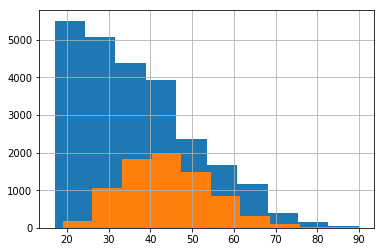

In [11]:
# 3.e
# Plotting a histogram to see the distribution of ages of adults who make more and less than 50K
tmp = adult_data[['age', 'income']]
moreThan = tmp[tmp['income'] == ">50K"]
lessThan = tmp[tmp['income'] == "<=50K"]
lessThan['age'].hist() # blue
moreThan['age'].hist() # orange

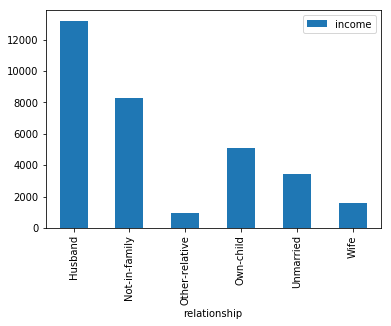

In [24]:
# 4.a
# Plotting a bar plot that shows a trend within a variable that does not have inter-relationship
# Count of adults at various relationships statuses
marital_status_data = adult_data[['relationship', 'income']]
marital_status_count = marital_status_data.groupby(by='relationship').count()
marital_status_count.plot.bar()

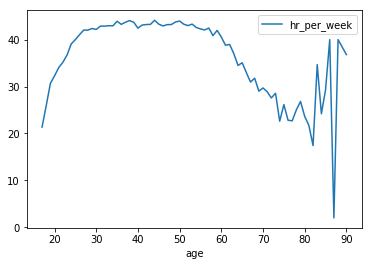

In [48]:
# 4.b
# Plotting a line plot where the x-axis variable manifests fully across the plot domain
line_data = adult_data[['age', 'hr_per_week']]
line_data.groupby(by='age').mean().plot.line()